In [33]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.inspection import permutation_importance
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier,PassiveAggressiveClassifier,Perceptron
import lightgbm as lgb


## Loading Dataset

In [34]:
data_url = ("/Users/vidyakumar/Desktop/python/apziva/ACME-HappinessSurvey2020.csv")

In [35]:
def load_data():
    data = pd.read_csv(data_url)
    return data

data = load_data()

data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [36]:
#renaming
data.columns = ['happiness_status', 'timely_delivery', 'expected_contents', 'complete_order', 'good_price', 'courier_satisfy', 'app_order_ease']
data.head()

,happiness_status,timely_delivery,expected_contents,complete_order,good_price,courier_satisfy,app_order_ease
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


## Exploratory Data Analysis

In [37]:
#checking for null values - has no null values
data.isnull().sum()

happiness_status     0
timely_delivery      0
expected_contents    0
complete_order       0
good_price           0
courier_satisfy      0
app_order_ease       0
dtype: int64

In [38]:
#dim of dataset
print(data.shape)

(126, 7)


In [39]:
#data description
print(data.describe())

       happiness_status  timely_delivery  expected_contents  complete_order  \
count            126.00           126.00             126.00          126.00   
mean               0.55             4.33               2.53            3.31   
std                0.50             0.80               1.11            1.02   
min                0.00             1.00               1.00            1.00   
25%                0.00             4.00               2.00            3.00   
50%                1.00             5.00               3.00            3.00   
75%                1.00             5.00               3.00            4.00   
max                1.00             5.00               5.00            5.00   

       good_price  courier_satisfy  app_order_ease  
count      126.00           126.00          126.00  
mean         3.75             3.65            4.25  
std          0.88             1.15            0.81  
min          1.00             1.00            1.00  
25%          3.00      

In [40]:
#balanced dataset 
data['happiness_status'].value_counts()


1    69
0    57
Name: happiness_status, dtype: int64

## Split - Training and Testing data

In [41]:
#creating training and testing dataset
X = data.drop(columns = 'happiness_status')
y = data['happiness_status']
print(X.head())
print(y.head())

   timely_delivery  expected_contents  complete_order  good_price  \
0                3                  3               3           4   
1                3                  2               3           5   
2                5                  3               3           3   
3                5                  4               3           3   
4                5                  4               3           3   

   courier_satisfy  app_order_ease  
0                2               4  
1                4               3  
2                3               5  
3                3               5  
4                3               5  
0    0
1    0
2    1
3    0
4    0
Name: happiness_status, dtype: int64


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
print(y_test.head())
print(X_train.shape)
print(X_test.shape)

8     0
50    1
43    0
24    1
63    0
Name: happiness_status, dtype: int64
(100, 6)
(26, 6)


## Modeling

### 1.Logistic Regression - 62% Accuracy

In [45]:
#logistic regression
logisticRegr = LogisticRegression()
lr = logisticRegr.fit(X_train, y_train)
y_pred=logisticRegr.predict(X_test)

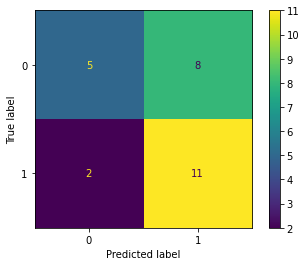

In [46]:
plot_confusion_matrix(logisticRegr, X_test, y_test)
plt.show()

In [47]:
#accuracy of 62%-Logistic regression
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.38      0.50        13
           1       0.58      0.85      0.69        13

    accuracy                           0.62        26
   macro avg       0.65      0.62      0.59        26
weighted avg       0.65      0.62      0.59        26



### 2.SVM Classifier - 69% Accuracy

In [48]:
#create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#training the model
svmc = clf.fit(X_train, y_train)

#model prediction
y_pred_clf = clf.predict(X_test)

In [49]:
#accuracy of 69%-SVM
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.86      0.46      0.60        13
           1       0.63      0.92      0.75        13

    accuracy                           0.69        26
   macro avg       0.74      0.69      0.67        26
weighted avg       0.74      0.69      0.67        26



### 3.KNN Classifier - 73% Accuracy

In [50]:
#knn classifier
k_range = range(1,50)                                
scores = {}                                          
score_list = []                                     
for k in k_range:                                    
    knn = KNeighborsClassifier(n_neighbors = k)     
    knn.fit(X_train, y_train)                        
    y_pred_knn = knn.predict(X_test)                 
    scores[k] = f1_score(y_test, y_pred_knn)         
    score_list.append(f1_score(y_test, y_pred_knn))  


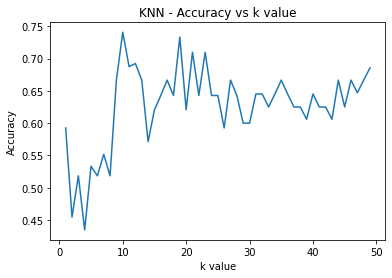

In [52]:
#identifying k value for best accuracy
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range, score_list)                   
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('KNN - Accuracy vs k value')
plt.show()

In [53]:
#Max score of 74% occurs at k=10
print(max(score_list))
print(max(scores, key=scores.get))

0.7407407407407408
10


In [54]:
#building the final knn model with k=10
knnc = KNeighborsClassifier(n_neighbors = 10)     
knf = knnc.fit(X_train, y_train)                        
y_pred_knn = knnc.predict(X_test)                 


In [55]:
#knn accuracy 73%
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.71      0.77      0.74        13

    accuracy                           0.73        26
   macro avg       0.73      0.73      0.73        26
weighted avg       0.73      0.73      0.73        26



### 4.Naives Bayes Classifier - 62% Accuracy

In [59]:
#Gaussian Classifier
gnb = GaussianNB()
nbc = gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

In [60]:
#naives bayes - 62% sccuracy
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.67      0.46      0.55        13
           1       0.59      0.77      0.67        13

    accuracy                           0.62        26
   macro avg       0.63      0.62      0.61        26
weighted avg       0.63      0.62      0.61        26



### 5.Decision Tree Classifier - 50% Accuracy

In [61]:
# DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 0)      
dtc.fit(X_train, y_train)                          
y_pred_dtc = dtc.predict(X_test)                    


In [62]:
#decision tree classifier accuracy - 50%
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.50      0.54      0.52        13
           1       0.50      0.46      0.48        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.50        26
weighted avg       0.50      0.50      0.50        26



### 6.SGD Classifier - 54% Accuracy

In [64]:
# SGDClassifier
sgd = SGDClassifier(shuffle=True, random_state=101)
sgd.fit(X_train, y_train)
y_pred_sgd=sgd.predict(X_test)

In [65]:
#sgd - 54% sccuracy
print(classification_report(y_test, y_pred_sgd))

              precision    recall  f1-score   support

           0       0.52      0.92      0.67        13
           1       0.67      0.15      0.25        13

    accuracy                           0.54        26
   macro avg       0.59      0.54      0.46        26
weighted avg       0.59      0.54      0.46        26



##### Range of accuracy - 50% to 73%

## Feature Importance 

### 1. Selectkbest 

In [66]:
#applying selectkbest method
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
fit.scores_

array([1.44904066, 0.03616135, 0.90010372, 0.106194  , 2.27328624,
       0.54107039])

In [67]:
#top4features
X_new=SelectKBest(score_func=chi2,k=4).fit_transform(X,y)
print(X_new[:5])
print(X.head())

[[3 3 2 4]
 [3 3 4 3]
 [5 3 3 5]
 [5 3 3 5]
 [5 3 3 5]]
   timely_delivery  expected_contents  complete_order  good_price  \
0                3                  3               3           4   
1                3                  2               3           5   
2                5                  3               3           3   
3                5                  4               3           3   
4                5                  4               3           3   

   courier_satisfy  app_order_ease  
0                2               4  
1                4               3  
2                3               5  
3                3               5  
4                3               5  


##### Top features - timelydelivery, completeorder, couriersatisfy, apporderease

### 2. Permutation Importance

In [69]:
import eli5
from eli5.sklearn import PermutationImportance

perm_lr = PermutationImportance(lr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm_lr, feature_names = X_test.columns.tolist())

Weight,Feature
0.0385 ± 0.0973,timely_delivery
0.0231 ± 0.0377,good_price
0.0077 ± 0.0576,courier_satisfy
0 ± 0.0000,app_order_ease
-0.0154 ± 0.0784,expected_contents
-0.0692 ± 0.0754,complete_order


In [70]:
perm_knn = PermutationImportance(knf, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm_knn, feature_names = X_test.columns.tolist())

Weight,Feature
0.1692 ± 0.2261,expected_contents
0.1692 ± 0.1794,timely_delivery
0.1385 ± 0.1043,good_price
0.0923 ± 0.1250,app_order_ease
0.0692 ± 0.1131,courier_satisfy
0.0462 ± 0.1569,complete_order


In [72]:
perm_svm = PermutationImportance(svmc, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm_svm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0769 ± 0.1754,timely_delivery
0.0077 ± 0.0308,good_price
-0.0077 ± 0.0576,courier_satisfy
-0.0077 ± 0.0576,complete_order
-0.0154 ± 0.0377,expected_contents
-0.0308 ± 0.0754,app_order_ease


##### timelydelivery and goodprice is present top4 for all the above tables, considering the fact that KNN gave us the best result, we will choose timely_delivery, expected_contents, app_order_ease and good_price 


#### Modeling with Permutation Importance Top 4 Features

In [73]:
X_new = X[['timely_delivery', 'good_price', 'expected_contents', 'app_order_ease']]


In [74]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new,y, test_size = 0.2, random_state = 0)
print(X_test_new.head())


    timely_delivery  good_price  expected_contents  app_order_ease
8                 4           4                  1               4
50                5           3                  1               4
43                4           4                  3               4
24                4           3                  3               4
63                5           2                  5               5


In [75]:
#building knn with top 4 features
k_range = range(1,100)                                       
scores_new = {}                                             
score_list_new = []                                         
for k in k_range:                                           
    knn = KNeighborsClassifier(n_neighbors = k)              
    knn.fit(X_train_new, y_train_new)                       
    y_pred_knn = knn.predict(X_test_new)                    
    scores_new[k] = f1_score(y_test_new, y_pred_knn)         
    score_list_new.append(f1_score(y_test_new, y_pred_knn))  
    

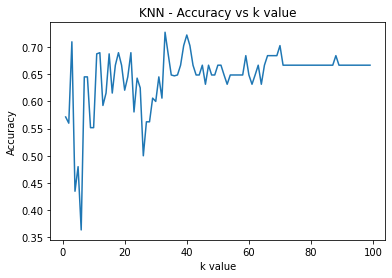

In [76]:
#identifying value of k for best accuracy
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range, score_list_new)                   
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('KNN - Accuracy vs k value')
plt.show()

In [77]:
#Max score of 72% occurs at k=33
print(max(score_list_new))
print(max(scores_new, key=scores_new.get))

0.7272727272727274
33


In [78]:
#KNN Model with k=33
knn_f_new = KNeighborsClassifier(n_neighbors = 33)            
knn_f_new.fit(X_train_new, y_train_new)                        
y_pred_knn_f_new = knn_f_new.predict(X_test_new)              

In [79]:
print(classification_report(y_test_new, y_pred_knn_f_new))


              precision    recall  f1-score   support

           0       0.83      0.38      0.53        13
           1       0.60      0.92      0.73        13

    accuracy                           0.65        26
   macro avg       0.72      0.65      0.63        26
weighted avg       0.72      0.65      0.63        26



##### Excluding the 2 least important features led to a 8% decrease in F1 score(KNN Model). Hence, it would be best to retain all 6 variables.

### 3. SHAP Feature Importance

In [80]:
#shap feature importance
import xgboost
import shap
model = xgboost.XGBRegressor().fit(X_train, y_train)
explainer = shap.TreeExplainer(model)                           # Explain the model using shap
shap_values = explainer.shap_values(X_train)                    # Get shap values for training data


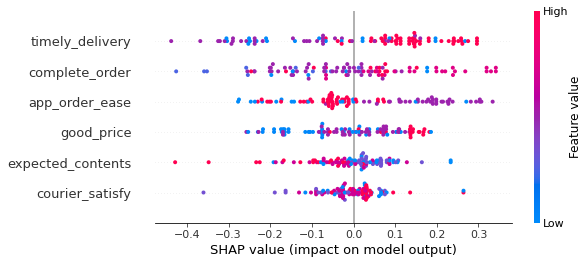

In [82]:
#Summary of feature importance for each row 
shap.summary_plot(shap_values, features = X_train, feature_names = X_train.columns) 


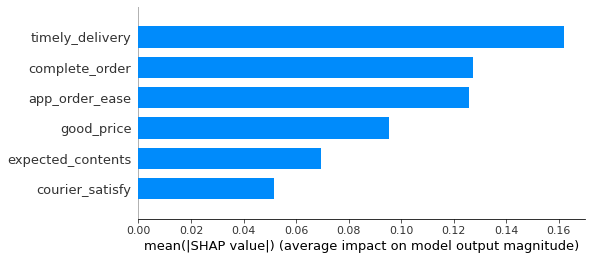

In [83]:
#Summary of feature importance using bar plot
shap.summary_plot(shap_values, features = X_train, feature_names = X_train.columns, plot_type = 'bar')


#### Modeling with SHAP Top 4 Features

In [84]:
#top4 features from shap
X_shap = X[['timely_delivery','app_order_ease', 'complete_order', 'good_price']]


In [85]:
X_train_shap, X_test_shap, y_train_shap, y_test_shap = train_test_split(X_shap,y, test_size = 0.2, random_state = 0)
print(X_test_shap.head())


    timely_delivery  app_order_ease  complete_order  good_price
8                 4               4               4           4
50                5               4               3           3
43                4               4               3           4
24                4               4               3           3
63                5               5               5           2


In [86]:
#knn with top 4 features from shap
k_range = range(1,100)                                       
scores_shap = {}                                              
score_list_shap = []                                          
for k in k_range:                                            
    knn = KNeighborsClassifier(n_neighbors = k)              
    knn.fit(X_train_shap, y_train_shap)                        
    y_pred_knn = knn.predict(X_test_shap)                     
    scores_shap[k] = f1_score(y_test_shap, y_pred_knn)         
    score_list_shap.append(f1_score(y_test_shap, y_pred_knn)) 
    

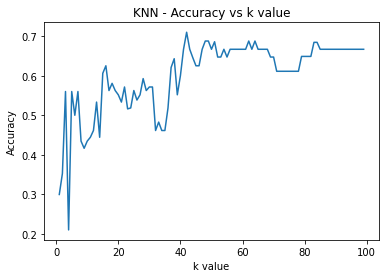

In [87]:
#identifying value of k for best accuracy
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range, score_list_shap)                   
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('KNN - Accuracy vs k value')
plt.show()

In [88]:
print(max(score_list_shap))
print(max(scores_shap, key=scores_shap.get))


0.7096774193548387
42


##### Excluding the 2 least important variables leads to a decrease in F1 score by 3%. Hence, it would be best to retain all 6 variables.

## Bagging Technique (Ensemble)

In [89]:
#applying bagging technique to knn
h=BaggingClassifier(KNeighborsClassifier(n_neighbors=10),max_samples=0.7,max_features=0.7,n_estimators=1000)

In [90]:
#applying bagging to our knn model reduced accuracy to 54%
h.fit(X_train,y_train)
y_pred_bag=h.predict(X_test)
print(classification_report(y_test,y_pred_bag))

              precision    recall  f1-score   support

           0       0.57      0.31      0.40        13
           1       0.53      0.77      0.62        13

    accuracy                           0.54        26
   macro avg       0.55      0.54      0.51        26
weighted avg       0.55      0.54      0.51        26



## Lazy Predict

### All Features

In [91]:
#using lazypredict to identify other models which might improve accuracy - all features
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)


100%|██████████| 29/29 [00:01<00:00, 28.90it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
Perceptron                         0.73               0.73     0.73      0.71   
PassiveAggressiveClassifier        0.69               0.69     0.69      0.69   
NearestCentroid                    0.69               0.69     0.69      0.69   
LGBMClassifier                     0.65               0.65     0.65      0.65   
BernoulliNB                        0.62               0.62     0.62      0.61   
SGDClassifier                      0.62               0.62     0.62      0.62   
GaussianNB                         0.62               0.62     0.62      0.61   
LogisticRegression                 0.62               0.62     0.62      0.59   
LinearDiscriminantAnalysis         0.58               0.58     0.58      0.54   
XGBClassifier                      0.58               0.58     0.58      0.57   
RidgeClassifierCV           

### Permutation Importance Features

In [92]:
#using lazypredict to identify other models which might improve accuracy - perm features
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_new, X_test_new, y_train_new, y_test_new)
print(models)

100%|██████████| 29/29 [00:01<00:00, 28.66it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.77               0.77     0.77      0.77   
PassiveAggressiveClassifier        0.77               0.77     0.77      0.77   
LGBMClassifier                     0.73               0.73     0.73      0.73   
BernoulliNB                        0.73               0.73     0.73      0.73   
Perceptron                         0.73               0.73     0.73      0.73   
NuSVC                              0.69               0.69     0.69      0.68   
SGDClassifier                      0.65               0.65     0.65      0.63   
LabelSpreading                     0.65               0.65     0.65      0.65   
CalibratedClassifierCV             0.62               0.62     0.62      0.55   
SVC                                0.62               0.62     0.62      0.58   
GaussianNB                  

### SHAP Features

In [93]:
#using lazypredict to identify other models which might improve accuracy - shap features
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_shap, X_test_shap, y_train_shap, y_test_shap)
print(models)

100%|██████████| 29/29 [00:00<00:00, 35.89it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SGDClassifier                      0.73               0.73     0.73      0.73   
PassiveAggressiveClassifier        0.65               0.65     0.65      0.65   
NearestCentroid                    0.65               0.65     0.65      0.65   
LinearSVC                          0.62               0.62     0.62      0.59   
LabelPropagation                   0.62               0.62     0.62      0.62   
XGBClassifier                      0.62               0.62     0.62      0.61   
RidgeClassifier                    0.62               0.62     0.62      0.59   
LogisticRegression                 0.62               0.62     0.62      0.59   
LinearDiscriminantAnalysis         0.62               0.62     0.62      0.59   
LGBMClassifier                     0.62               0.62     0.62      0.62   
GaussianNB                  

##### Let's proceed to build models based on the top models predicted by Lazy predict

## Lazy Predict Top Models

### 1. SGD with SHAP Variables - 62% Accuracy

In [94]:
#sgd with 4 variables(shap) improved accuracy from 54% to 62%
sgd = SGDClassifier(shuffle=True, random_state=101)
sgd.fit(X_train_shap, y_train_shap)
y_pred_sgd=sgd.predict(X_test_shap)

In [95]:
print(classification_report(y_test_shap, y_pred_sgd))

              precision    recall  f1-score   support

           0       1.00      0.23      0.38        13
           1       0.57      1.00      0.72        13

    accuracy                           0.62        26
   macro avg       0.78      0.62      0.55        26
weighted avg       0.78      0.62      0.55        26



### 2. Nearest Centroid Classifier with PERM Variables - 77% Accuracy

In [96]:
# Creating the Nearest Centroid Classifier
model_nc = NearestCentroid()
 
# new highest accuracy of 77%
model_nc.fit(X_train_new, y_train_new.values.ravel())
print(classification_report(y_test_new, model_nc.predict(X_test_new)))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.77      0.77      0.77        13

    accuracy                           0.77        26
   macro avg       0.77      0.77      0.77        26
weighted avg       0.77      0.77      0.77        26



### 3. Perceptron with all variables - 50% Accuracy

In [98]:
#unexpectedly perceptron did not work as expected (73% accuracy was predicted)
model_perc = Perceptron(tol=1e-3, random_state=0)
model_perc.fit(X_train, y_train)
perc_pred = model_perc.predict(X_test)
print(classification_report(y_test, perc_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.50      1.00      0.67        13

    accuracy                           0.50        26
   macro avg       0.25      0.50      0.33        26
weighted avg       0.25      0.50      0.33        26



### 4. PAC with PERM variables - 50% Accuracy

In [99]:
#unexpectedly PAC did not work as expected (77% accuracy was predicted)
model_pac = PassiveAggressiveClassifier(C=0.5, random_state = 5)             
model_pac.fit(X_train_new, y_train_new)                                      
pac_pred = model_pac.predict(X_test_new)                                
print(classification_report(y_test_new, pac_pred))                 

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        13
           1       0.00      0.00      0.00        13

    accuracy                           0.50        26
   macro avg       0.25      0.50      0.33        26
weighted avg       0.25      0.50      0.33        26



### 5. LGBM with PERM variables - 73% Accuracy

In [101]:
#LGBM model ran as expected (73% accuracy was predicted)
model_lgb = lgb.LGBMClassifier()
model_lgb.fit(X_train_new, y_train_new)
lgb_pred=model_lgb.predict(X_test_new)
print(classification_report(y_test_new, lgb_pred))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.71      0.77      0.74        13

    accuracy                           0.73        26
   macro avg       0.73      0.73      0.73        26
weighted avg       0.73      0.73      0.73        26



### 6. Bernoulli Classifier with PERM variables - 50% Accuracy

In [103]:
#unexpectedly Bernoulli did not work as expected (73% accuracy was predicted)
model_bnb = BernoulliNB()
model_bnb.fit(X_train_new, y_train_new)
bnb_pred = model_bnb.predict(X_test_new)
print(classification_report(y_test_new, bnb_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.50      1.00      0.67        13

    accuracy                           0.50        26
   macro avg       0.25      0.50      0.33        26
weighted avg       0.25      0.50      0.33        26



## Final Thoughts

##### Highest accuracy: 77%
##### Best Performing Model: Nearest Centroid model 
##### Top 4 features: 'timely_delivery', 'good_price', 'expected_contents', 'app_order_ease'
##### Feature Importance Method Used: Permutation Importance
